<a href="https://colab.research.google.com/github/YUVASRI2K/Handwritten-Digit-RecognitionusingDeepLearning-Yuvasri/blob/main/svm_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

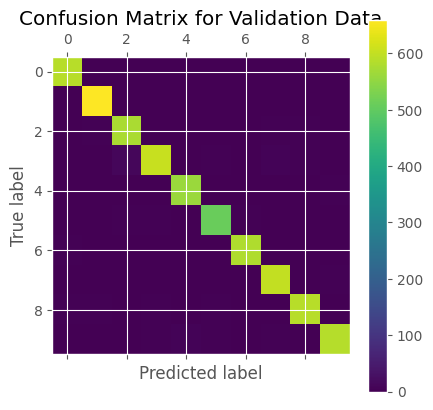

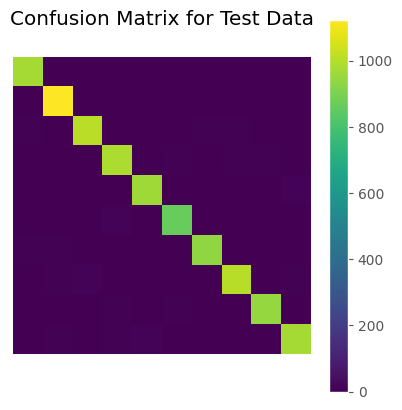

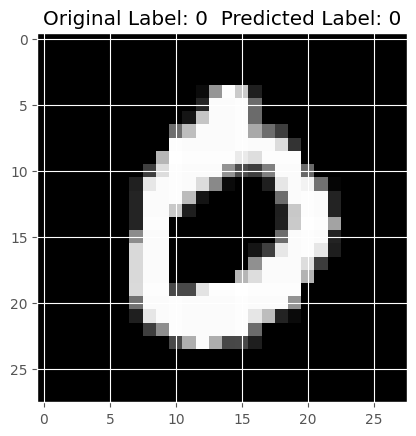

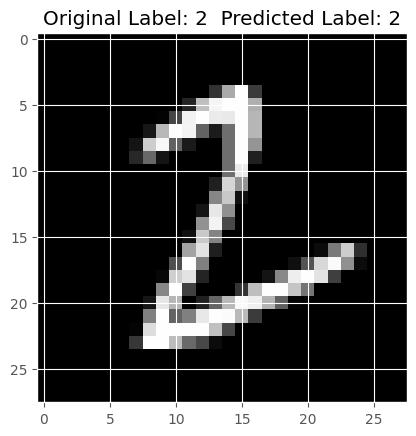

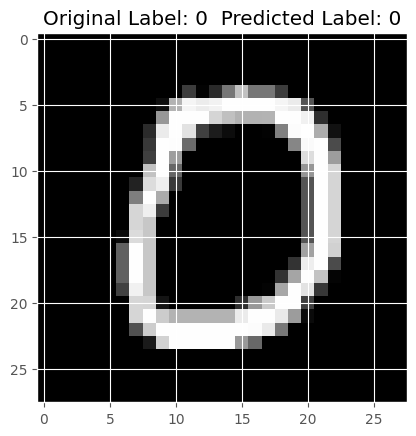

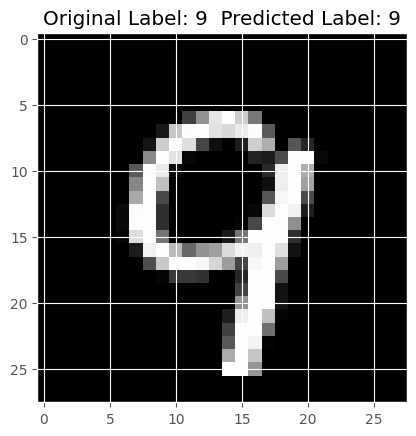

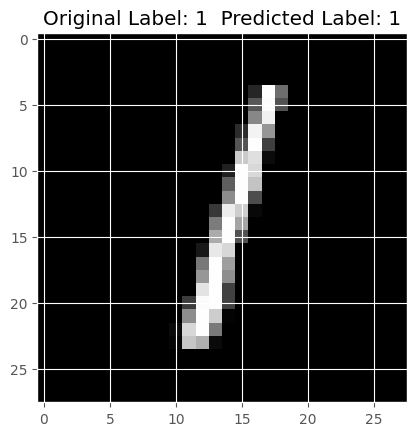

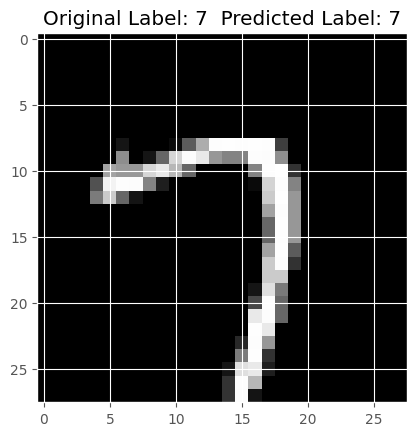

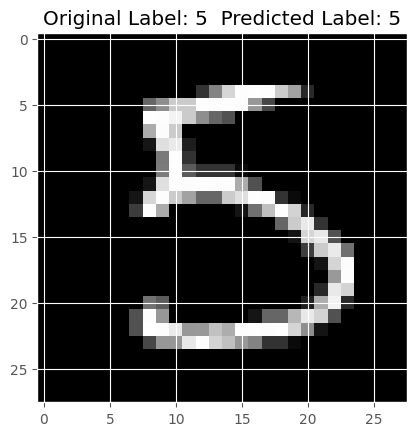

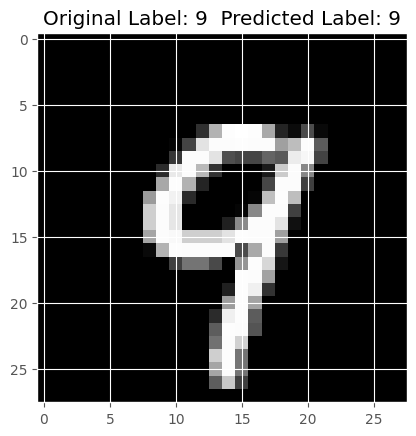

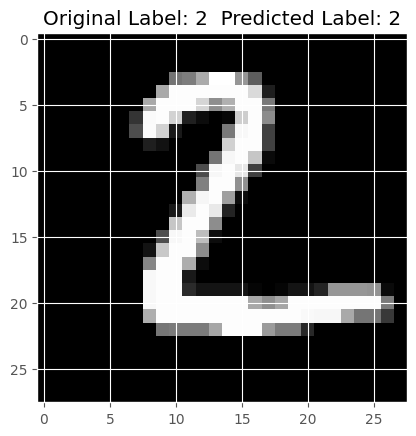

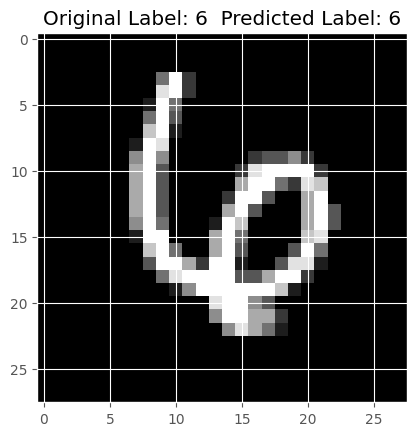

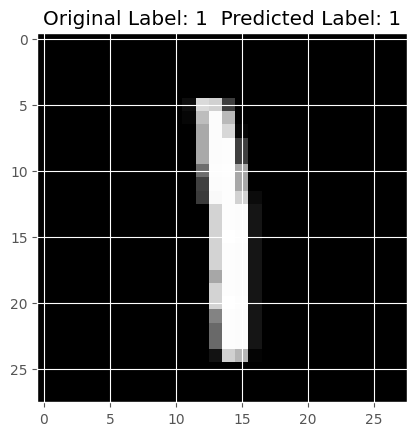

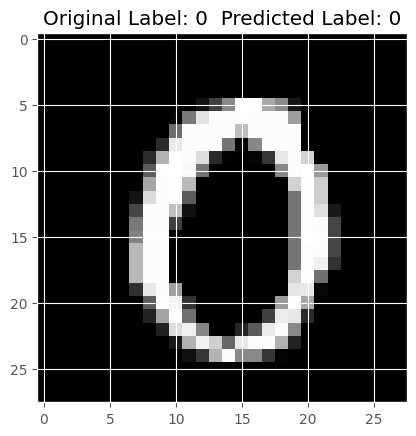

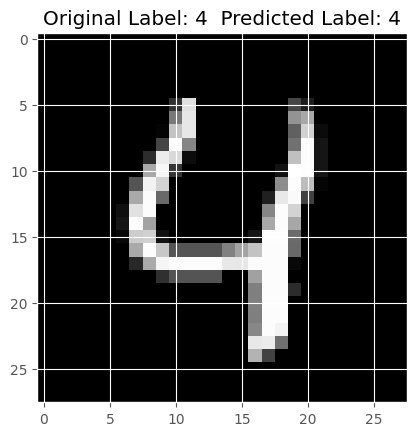

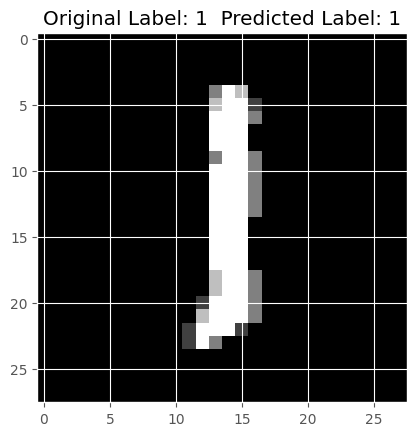

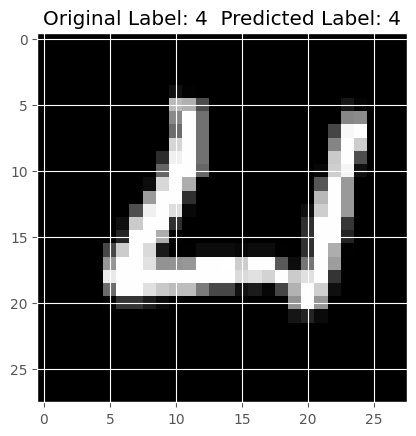

In [4]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
import struct

style.use('ggplot')

# Function to load MNIST dataset from .idx files
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, 784)
        return images

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

# Save all the Print Statements in a Log file
old_stdout = sys.stdout
log_file = open("summary.log", "w")
sys.stdout = log_file

# Load MNIST Data
print('\nLoading MNIST Data...')
train_img = load_mnist_images('/content/train-images-idx3-ubyte')
train_labels = load_mnist_labels('/content/train-labels-idx1-ubyte')

test_img = load_mnist_images('/content/t10k-images-idx3-ubyte')
test_labels = load_mnist_labels('/content/t10k-labels-idx1-ubyte')

# Normalize pixel values (0-255 to 0-1)
train_img = train_img / 255.0
test_img = test_img / 255.0

# Features and Labels
X = train_img
y = train_labels

# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# SVM Classifier with gamma = 0.1; Kernel = polynomial
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train, y_train)

# Pickle the Classifier for Future Use
print('\nPickling the Classifier for Future Use...')
with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Load pickled classifier
pickle_in = open('MNIST_SVM.pickle', 'rb')
clf = pickle.load(pickle_in)

# Accuracy on Validation Data
print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test, y_test)

# Predictions on Validation Data
print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

# Calculate Accuracy and Confusion Matrix
print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)
print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

# Log results
print('\nSVM Trained Classifier Accuracy: ', acc)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Images: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix for Validation Data
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Predictions on Test Data
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

# Accuracy on Test Data
print('\nCalculating Accuracy of Trained Classifier on Test Data...')
acc = accuracy_score(test_labels, test_labels_pred)

# Confusion Matrix for Test Data
print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)

# Log results for Test Data
print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

sys.stdout = old_stdout
log_file.close()

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1, 40, 15)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
